In [120]:
import sklearn

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import datetime

In [123]:
automobile_df = pd.read_csv('auto-mpg.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [124]:
automobile_df.shape

(398, 9)

In [125]:
automobile_df = automobile_df.replace('?', np.nan)

In [126]:
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [127]:
automobile_df.drop(['car name', 'origin'], axis=1, inplace=True)

In [128]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
120,19.0,4,121.0,112,2868,15.5,73
50,28.0,4,116.0,90,2123,14.0,71
361,25.4,6,168.0,116,2900,12.6,81
194,22.5,6,232.0,90,3085,17.6,76
10,15.0,8,383.0,170,3563,10.0,70


In [129]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [130]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
346,32.3,4,97.0,67,2065,17.8,1981
277,16.2,6,163.0,133,3410,15.8,1978
211,16.5,6,168.0,120,3820,16.7,1976
290,15.5,8,351.0,142,4054,14.3,1979
323,27.9,4,156.0,105,2800,14.4,1980


In [131]:
automobile_df['age'] = datetime.datetime.now().year - automobile_df['model year'].astype(int)

In [132]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [133]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
21,24.0,4,107.0,90,2430,14.5,52
159,14.0,8,351.0,148,4657,13.5,47
52,30.0,4,88.0,76,2065,14.5,51
344,39.0,4,86.0,64,1875,16.4,41
175,29.0,4,90.0,70,1937,14.0,47


In [134]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int32
dtype: object

In [135]:
automobile_df['horsepower'] = automobile_df['horsepower'].astype(float)

In [136]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,46.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,43.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,46.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


Text(0, 0.5, 'cylinders')

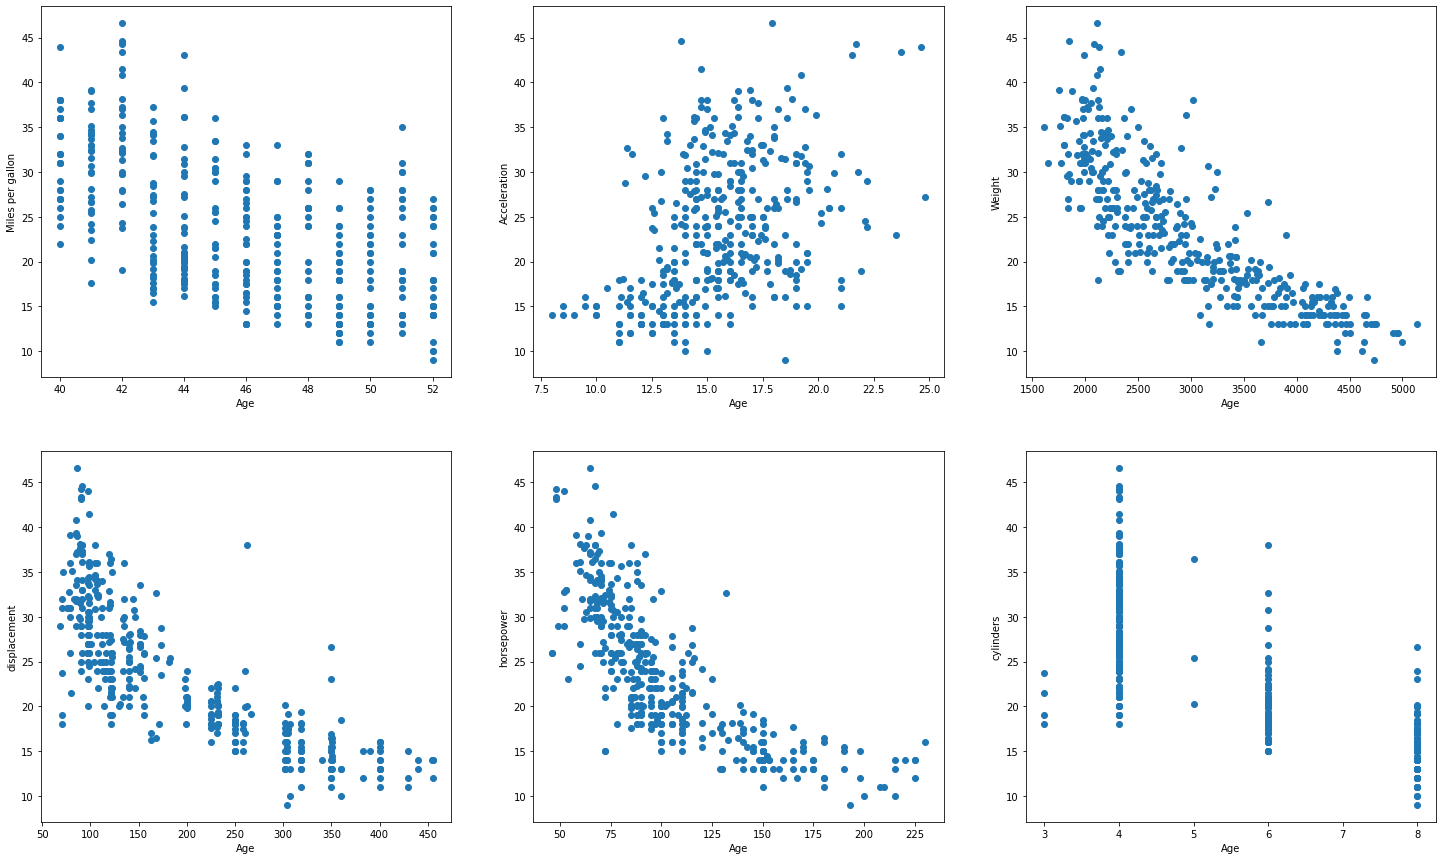

In [137]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))

axs[0, 0].scatter(automobile_df['age'], automobile_df['mpg'])
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Miles per gallon')

axs[0, 1].scatter(automobile_df['acceleration'], automobile_df['mpg'])
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Acceleration')

axs[0, 2].scatter(automobile_df['weight'], automobile_df['mpg'])
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('Weight')

axs[1, 0].scatter(automobile_df['displacement'], automobile_df['mpg'])
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('displacement')

axs[1, 1].scatter(automobile_df['horsepower'], automobile_df['mpg'])
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('horsepower')

axs[1, 2].scatter(automobile_df['cylinders'], automobile_df['mpg'])
axs[1, 2].set_xlabel('Age')
axs[1, 2].set_ylabel('cylinders')


In [138]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

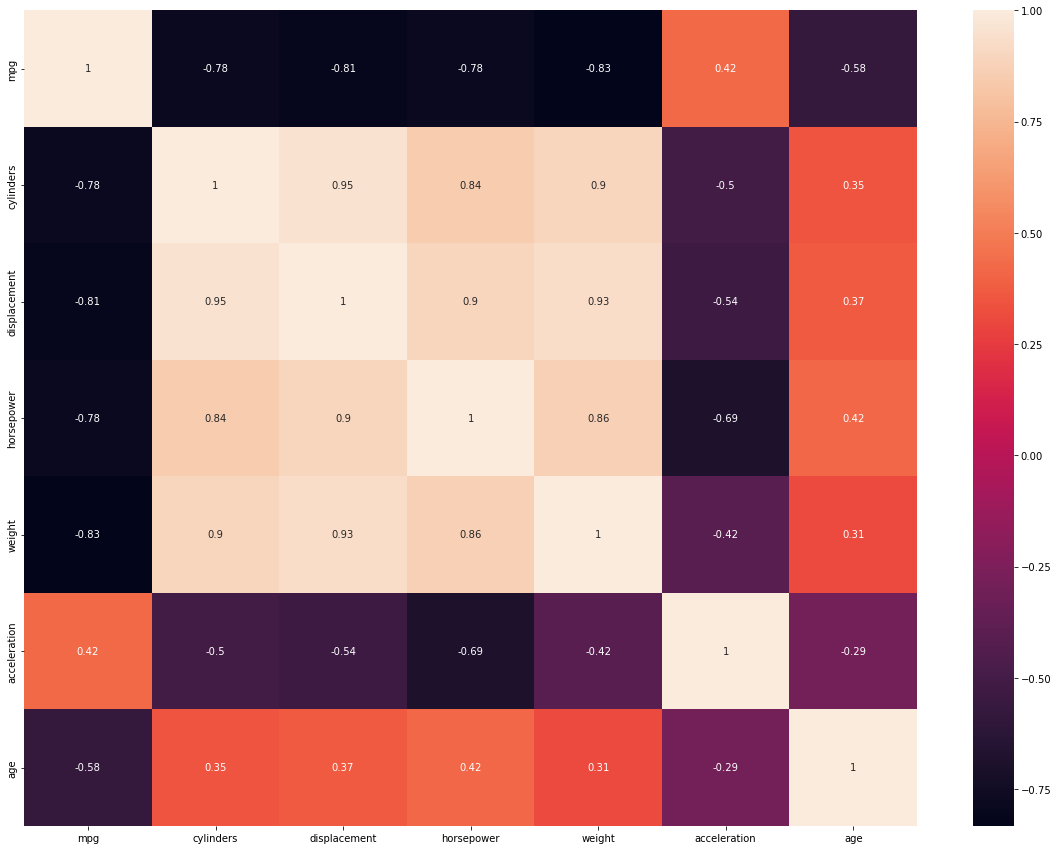

In [139]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(automobile_corr, annot=True, ax=ax)

In [140]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,27.2,4,119.0,97.0,2300,14.7,44
1,13.0,8,350.0,145.0,3988,13.0,49
2,32.4,4,107.0,72.0,2290,17.0,42
3,15.0,8,350.0,145.0,4082,13.0,49
4,13.0,8,360.0,175.0,3821,11.0,49


In [141]:
automobile_df.to_csv('automobile_df_processed.csv', index=False)